In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data=pd.read_csv(r"C:\Users\rushi\OneDrive\Desktop\imp\project\digitRecognizer\train.csv")

In [4]:
data = np.array(data)
m, n = data.shape

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
n_train, m_train = X_train.shape

In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    B1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    B2 = np.random.rand(10, 1) - 0.5
    return W1, B1, W2, B2

In [6]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def one_hot(Y):
    one_hot_Y = np.zeros((Y.max() + 1, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1;
    return one_hot_Y 

def deriv(Z):
    return Z > 0

In [7]:
def forward_prop(W1, B1, W2, B2, X):
    Z1 = np.dot(W1, X) + B1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + B2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [8]:
def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    Y_true = one_hot(Y)
    loss2 = A2 - Y_true
    dW2 = 1 / m * loss2.dot(A1.T)
    dB2 = 1 / m * np.sum(loss2)
    loss1 = W2.T.dot(loss2) * deriv(Z1)
    dW1 = 1 / m * loss1.dot(X_train.T)
    dB1 = 1 / m * np.sum(loss1)
    return dW1, dB1, dW2, dB2

In [9]:
def update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha):
    alpha = 0.1
    W1 = W1 - alpha * dW1
    B1 = B1 - alpha * dB1
    W2 = W2 - alpha * dW2
    B2 = B2 - alpha * dB2
    return W1, B1, W2, B2

In [10]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [11]:
def grad_descent(X, Y, alpha, iterations):
    W1, B1, W2, B2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, B1, W2, B2, X)
        dW1, dB1, dW2, dB2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, B1, W2, B2 = update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, B1, W2, B2

In [12]:
W1, B1, W2, B2 = grad_descent(X_train, Y_train, 0.1, 500)

Iteration:  0
[5 1 3 ... 7 5 6] [1 5 1 ... 7 6 9]
0.10448780487804878
Iteration:  10
[7 1 3 ... 1 5 0] [1 5 1 ... 7 6 9]
0.18124390243902438
Iteration:  20
[1 1 1 ... 1 2 0] [1 5 1 ... 7 6 9]
0.2705609756097561
Iteration:  30
[1 4 1 ... 1 2 0] [1 5 1 ... 7 6 9]
0.3482195121951219
Iteration:  40
[1 4 1 ... 7 2 0] [1 5 1 ... 7 6 9]
0.4218048780487805
Iteration:  50
[1 4 1 ... 7 2 0] [1 5 1 ... 7 6 9]
0.47821951219512193
Iteration:  60
[1 4 1 ... 7 2 2] [1 5 1 ... 7 6 9]
0.5300731707317073
Iteration:  70
[1 4 1 ... 7 2 2] [1 5 1 ... 7 6 9]
0.5744390243902439
Iteration:  80
[1 4 1 ... 7 2 2] [1 5 1 ... 7 6 9]
0.6104390243902439
Iteration:  90
[1 4 1 ... 7 6 2] [1 5 1 ... 7 6 9]
0.6384878048780488
Iteration:  100
[1 4 1 ... 7 6 2] [1 5 1 ... 7 6 9]
0.6636829268292683
Iteration:  110
[1 4 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.6835609756097561
Iteration:  120
[1 4 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.6994146341463414
Iteration:  130
[1 4 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.7120243902439024
Iteration:  14

In [13]:
def make_predictions(X, W1, B1, W2, B2):
    _, _, _, A2 = forward_prop(W1, B1, W2, B2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(idx, W1, B1, W2, B2):
    current_image = X_train[:, idx, None]
    prediction = make_predictions(X_train[:, idx, None], W1, B1, W2, B2)
    label = Y_train[idx]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


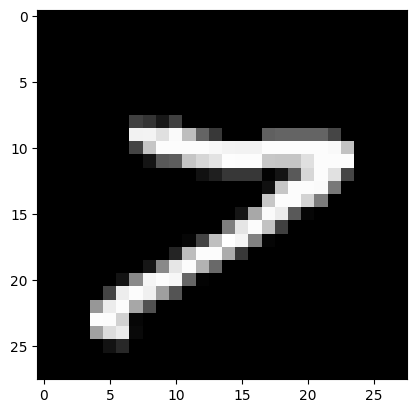

In [15]:
test_prediction(100, W1, B1, W2, B2)